In [1]:
import numpy as np
import pandas as pd

### Aritmética y alineación de datos

In [3]:
np.arange(9.).reshape((3, 3))

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [4]:
list('abc')

['a', 'b', 'c']

In [5]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), 
                   columns=list('bcd'),
                   index=['Chiapas','CDMX','Hidalgo'])

In [6]:
df1

,b,c,d
Chiapas,0.0,1.0,2.0
CDMX,3.0,4.0,5.0
Hidalgo,6.0,7.0,8.0


In [7]:
df2 = pd.DataFrame(np.arange(12.).reshape((4,3)), 
                   columns=list('bde'),
                   index=['Sonora','Chiapas','CDMX','Guerrero'])

In [8]:
df2

,b,d,e
Sonora,0.0,1.0,2.0
Chiapas,3.0,4.0,5.0
CDMX,6.0,7.0,8.0
Guerrero,9.0,10.0,11.0


Sumar ambos devuelve un dataframe con un índice y columnas que son las uniones de las correspondientes de cada dataframe:


In [9]:
df1 + df2

,b,c,d,e
CDMX,9.0,NaN,12.0,NaN
Chiapas,3.0,NaN,6.0,NaN
Guerrero,NaN,NaN,NaN,NaN
Hidalgo,NaN,NaN,NaN,NaN
Sonora,NaN,NaN,NaN,NaN


Como las columnas “c” y “e” no están en ambos objetos DataFrame,
aparecen como ausentes en el resultado. Lo mismo ocurre con las filas con etiquetas que no son comunes para ambos objetos.

In [10]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))

In [11]:
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)), 
                   columns=list('abcde'))

In [63]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [8]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [12]:
df2.loc[1, 'b'] = np.nan

In [13]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [14]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Utilizando el método add en df1, pasamos df2 y un argumento a fill_value, que sustituye el valor pasado por cualquier valor faltante en la operación:

In [67]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [15]:
1/df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


Al reindexar un dataframe se puede también especificar un valor de relleno diferente:

In [70]:
df1.reindex(columns = df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### Operaciones entre objetos DataFrame

In [18]:
arr = np.arange(12.).reshape((3, 4))

In [19]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [20]:
arr[0]

array([0., 1., 2., 3.])

In [21]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

Las operaciones entre un dataframe son similares:

In [22]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns = list('abc'),
                     index = ['CDMX','Chiapas','Sonora',
                              'Aguascalientes'])            

In [23]:
frame

,a,b,c
CDMX,0.0,1.0,2.0
Chiapas,3.0,4.0,5.0
Sonora,6.0,7.0,8.0
Aguascalientes,9.0,10.0,11.0


In [24]:
serie = frame.iloc[0]

In [25]:
serie

a    0.0
b    1.0
c    2.0
Name: CDMX, dtype: float64

In [26]:
frame - serie

,a,b,c
CDMX,0.0,0.0,0.0
Chiapas,3.0,3.0,3.0
Sonora,6.0,6.0,6.0
Aguascalientes,9.0,9.0,9.0


### Aplicación y asignación de funciones

Las ufuncs de NumPy (métodos de array por elementos) trabajan también con objetos pandas:

In [28]:
frame = pd.DataFrame(np.random.standard_normal((4,3)),
                     columns = list('bde'),
                     index = ['CDMX','Chiapas','Sonora',
                              'Aguascalientes'])            

In [82]:
frame

,b,d,e
CDMX,0.250245,-1.540096,-1.639072
Chiapas,1.012555,-0.729155,-1.402520
Sonora,-1.516038,-0.049293,-0.662453
Aguascalientes,-1.332260,-1.843713,1.754255


In [38]:
np.abs(frame)

,b,d,e
CDMX,1.436883,0.442900,2.843589
Chiapas,0.093103,0.609952,1.578432
Sonora,0.574022,0.142672,0.062927
Aguascalientes,0.815693,0.640770,0.202115


Otra operación frecuente es aplicar una función en arrays unidimensionales a cada columna o fila. El método apply del objeto
DataFrame hace exactamente esto:

In [39]:
def f1(x): return x.max()-x.min()

In [40]:
frame.apply(f1)

b    2.252575
d    0.783442
e    3.045704
dtype: float64

In [42]:
frame

,b,d,e
CDMX,-1.436883,-0.442900,2.843589
Chiapas,-0.093103,-0.609952,1.578432
Sonora,0.574022,0.142672,0.062927
Aguascalientes,0.815693,-0.640770,-0.202115


Si se pasa axis='columns' a apply, lo que ocurre es que la función se invoca una vez por fila.

In [43]:
frame.apply(f1, axis='columns')

CDMX              4.280471
Chiapas           2.188384
Sonora            0.511095
Aguascalientes    1.456463
dtype: float64

La función pasada a apply no tiene que devolver un valor escalar; también puede devolver una serie con varios valores:

In [44]:
def f2(x):
    return pd.Series([x.min(), x.max()], index=['min','max'])

In [45]:
frame.apply(f2)

,b,d,e
min,-1.436883,-0.640770,-0.202115
max,0.815693,0.142672,2.843589


### Estadísticas descriptivas

Los objetos pandas están equipados con un conjunto de métodos matemáticos y estadísticos comunes.

In [46]:
 df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                    [np.nan, np.nan], [0.75, -1.3]],
                   index=['a', 'b', 'c', 'd'],
                   columns=['uno', 'dos'])

In [47]:
df

,uno,dos
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [48]:
df.sum()

uno    9.25
dos   -5.80
dtype: float64

In [49]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

Para no excluir valores nulos

In [50]:
df.sum(axis='index', skipna=False)

uno   NaN
dos   NaN
dtype: float64

In [51]:
df.sum(axis='columns', skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

**mean** requieren al menos un valor no nulo para producir un resultado con valor

In [131]:
df.mean(axis='columns')

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [53]:
df

,uno,dos
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Algunos métodos, como idxmin e idxmax, devuelven el valor de índice en el que se alcanzan los valores mínimo y máximo:

In [54]:
df.idxmax()

uno    b
dos    d
dtype: object

In [55]:
df.cumsum()

,uno,dos
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


**describe** produce varias estadísticas de resumen de una sola vez:

In [56]:
df.describe()

,uno,dos
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


En datos cualitativos, describe produce estadísticas de resumen
alternativas:

In [57]:
obj = pd.DataFrame(['a','a','b','c'] * 4)

In [58]:
obj

,0
0,a
1,a
2,b
3,c
4,a
5,a
6,b
7,c
8,a
9,a


In [59]:
obj.describe()

,0
count,16
unique,3
top,a
freq,8


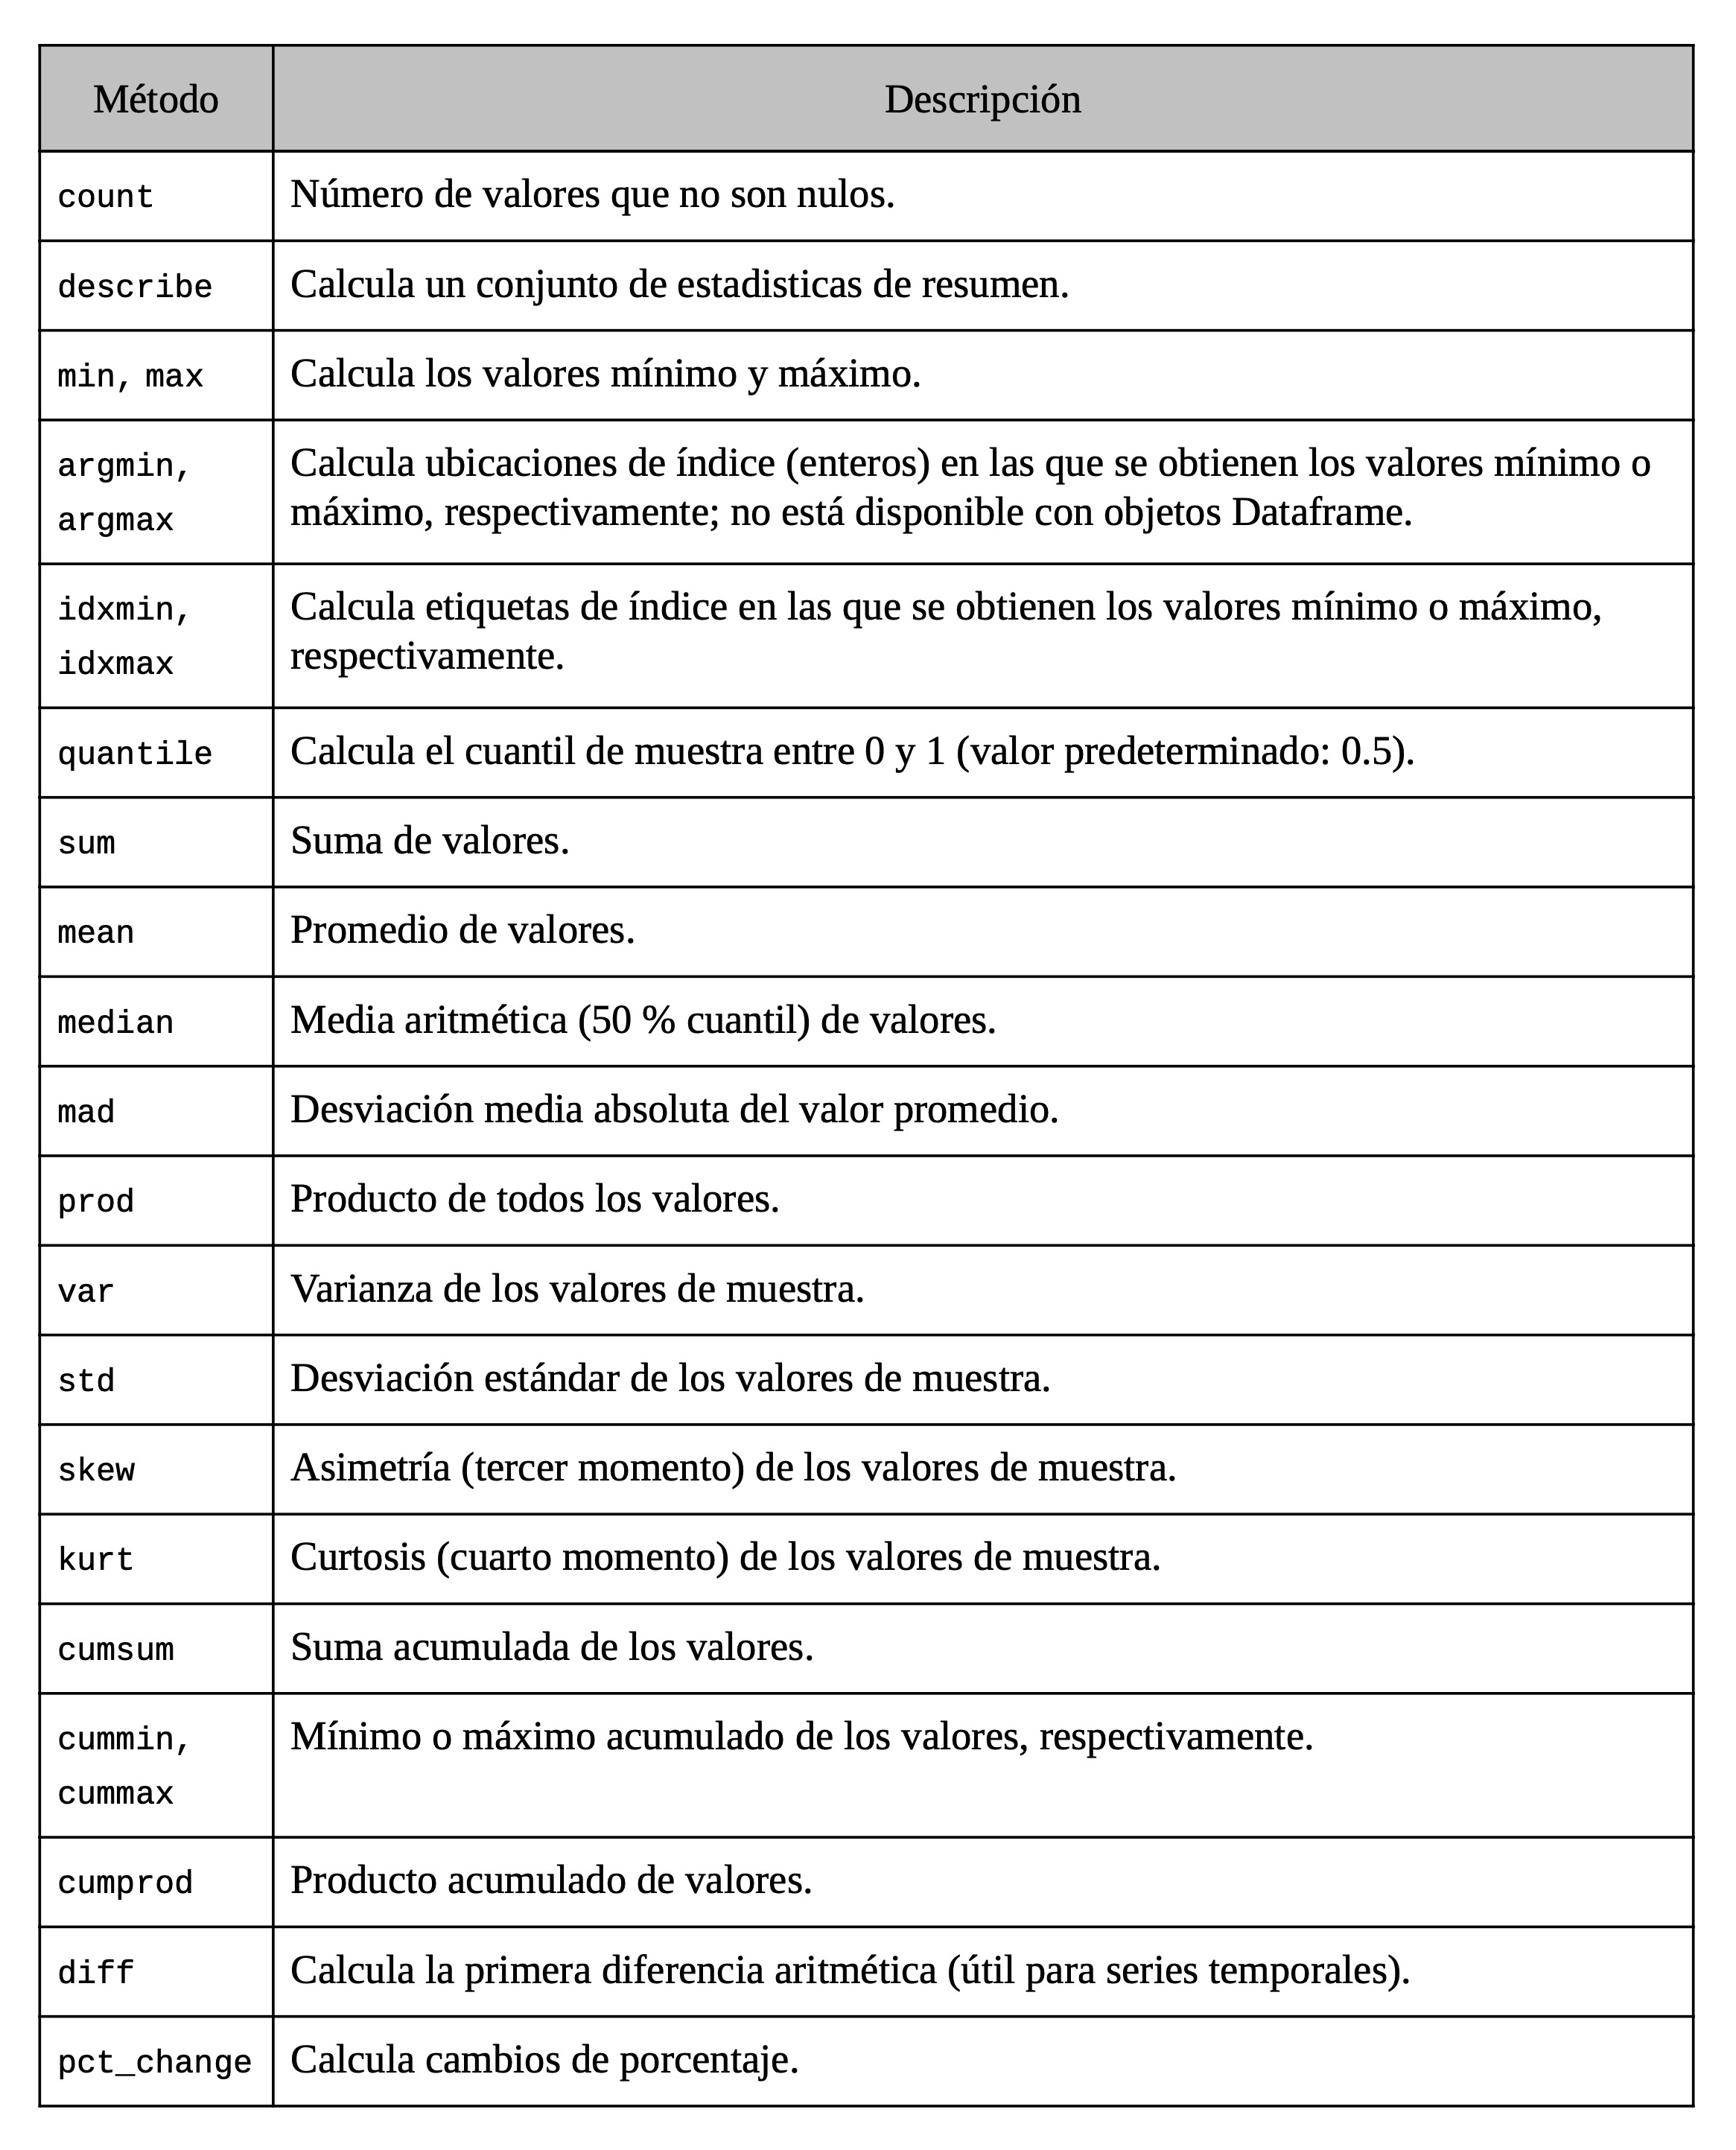

In [61]:
df = pd.read_csv("CEMEXCPO.csv")

In [62]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")

In [63]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-01,7.77,7.93,7.71,7.81,7.81,13483052.0
2022-07-04,7.80,7.91,7.71,7.75,7.75,6254285.0
2022-07-05,7.70,8.05,7.56,8.01,8.01,25663650.0
2022-07-06,8.04,8.20,7.95,8.04,8.04,24300505.0
2022-07-07,8.09,8.27,8.00,8.03,8.03,22963646.0
...,...,...,...,...,...,...
2023-06-26,11.91,12.09,11.79,11.82,11.82,51860289.0
2023-06-27,11.82,12.17,11.72,12.04,12.04,47539913.0
2023-06-28,12.06,12.11,11.85,11.90,11.90,48368870.0


In [64]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,9.127143,9.283413,8.995000,9.146786,9.146786,3.071537e+07
std,1.489086,1.505354,1.492303,1.503111,1.503111,1.839546e+07
min,6.600000,6.810000,6.480000,6.500000,6.500000,9.855990e+05
25%,8.027500,8.137500,7.915000,8.030000,8.030000,1.938691e+07
50%,8.900000,9.040000,8.740000,8.920000,8.920000,2.908139e+07
75%,9.982500,10.130000,9.882500,10.020000,10.020000,3.772036e+07
max,12.600000,12.690000,12.430000,12.530000,12.530000,1.428125e+08


In [65]:
df.idxmin()

Open        2022-10-17
High        2022-10-14
Low         2022-10-14
Close       2022-10-14
Adj Close   2022-10-14
Volume      2022-09-05
dtype: datetime64[ns]

In [66]:
df.idxmax()

Open        2023-06-16
High        2023-06-15
Low         2023-06-15
Close       2023-06-15
Adj Close   2023-06-15
Volume      2023-05-31
dtype: datetime64[ns]

### Correlación

In [74]:
contam = pd.read_excel('contam2022.xlsx')

In [75]:
contam

,Fecha,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
0,2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
1,2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2,2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
3,2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
4,2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000
...,...,...,...,...,...,...
360,2022-12-27,19.041667,5.750000,18.541667,5.583333,39.500000
361,2022-12-28,17.041667,11.000000,19.125000,8.583333,53.666667
362,2022-12-29,14.083333,4.750000,16.791667,7.625000,42.416667
363,2022-12-30,12.416667,4.916667,17.625000,10.166667,45.500000


In [76]:
contam.columns = ['Fecha','ozono','dioxido_azufre',
                  'dioxido_nitrogeno','monoxido_carbono',
                  'PM10']

In [77]:
contam

,Fecha,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
0,2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
1,2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2,2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
3,2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
4,2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000
...,...,...,...,...,...,...
360,2022-12-27,19.041667,5.750000,18.541667,5.583333,39.500000
361,2022-12-28,17.041667,11.000000,19.125000,8.583333,53.666667
362,2022-12-29,14.083333,4.750000,16.791667,7.625000,42.416667
363,2022-12-30,12.416667,4.916667,17.625000,10.166667,45.500000


In [78]:
contam = contam.set_index("Fecha")

In [79]:
contam

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000
...,...,...,...,...,...
2022-12-27,19.041667,5.750000,18.541667,5.583333,39.500000
2022-12-28,17.041667,11.000000,19.125000,8.583333,53.666667
2022-12-29,14.083333,4.750000,16.791667,7.625000,42.416667


El método **corr** del objeto Series calcula la correlación de los valores superpuestos, no nulos y alineados por índice en dos series.

In [80]:
contam['ozono'].corr(contam['monoxido_carbono'])

-0.0033312278943268816

Los métodos **corr** y **cov** del objeto DataFrame, por otro lado, devuelven una correlación completa o una matriz de covarianza como un dataframe

In [52]:
contam.corr()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
ozono,1.000000,0.101920,0.142250,-0.003331,0.481932
dioxido_azufre,0.101920,1.000000,0.310672,0.180158,0.456039
dioxido_nitrogeno,0.142250,0.310672,1.000000,0.844692,0.626440
monoxido_carbono,-0.003331,0.180158,0.844692,1.000000,0.559163
PM10,0.481932,0.456039,0.626440,0.559163,1.000000


De forma similar, **cov** calcula la covarianza:

In [81]:
contam.cov()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
ozono,114.128630,5.553729,5.758530,-0.062310,94.022209
dioxido_azufre,5.553729,26.016878,6.004689,1.608928,42.479254
dioxido_nitrogeno,5.758530,6.004689,14.358917,5.604212,43.349899
monoxido_carbono,-0.062310,1.608928,5.604212,3.065564,17.878901
PM10,94.022209,42.479254,43.349899,17.878901,333.499245


Utilizando el método **corrwith** se pueden calcular correlaciones por pares entre las columnas de un Dataframe 

In [84]:
contam.corrwith(contam['PM10'])

ozono                0.481932
dioxido_azufre       0.456039
dioxido_nitrogeno    0.626440
monoxido_carbono     0.559163
PM10                 1.000000
dtype: float64